## XYMasking aug in Albumentations

This transform is a generalization of the [TimeMasking](https://pytorch.org/audio/main/generated/torchaudio.transforms.TimeMasking.html) and [FrequencyMasking](https://pytorch.org/audio/main/generated/torchaudio.transforms.FrequencyMasking.html) from torchaudio.

In [ ]:
import random

import cv2
from matplotlib import pyplot as plt

import albumentations as A

In [ ]:
import torchaudio
import torch
from pathlib import Path
import numpy as np
import pandas as pd

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
img = np.load('../images/spectrogram.npy')

In [ ]:
img.shape

(128, 256, 4)

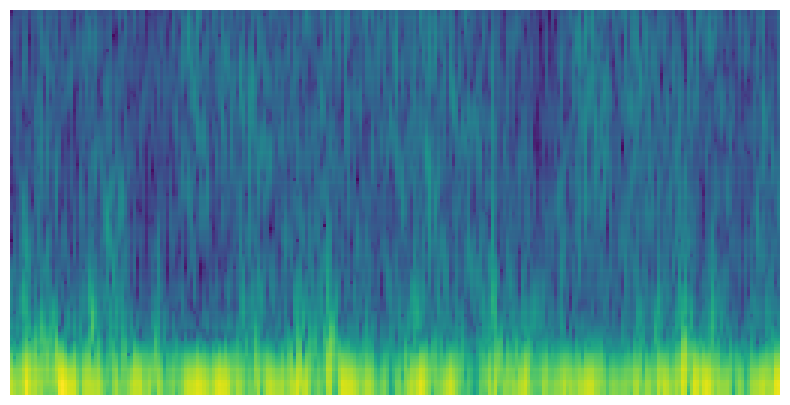

In [ ]:
visualize(img[:, :, 0])

## One vertical stripe (time masking) with fixed width, filled with 0

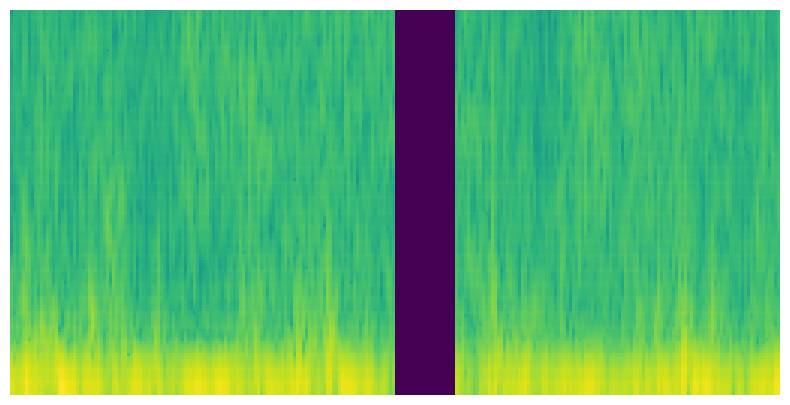

In [ ]:
params1 = {
    "num_masks_x": 1,    
    "mask_x_length": 20,
    "fill_value": 0,    

}
transform1 = A.Compose([A.XYMasking(**params1, p=1)])
visualize(transform1(image=img[:, :, 0])["image"])

## One vertical stripe (time masking) with randomly sampled width, filled with 0

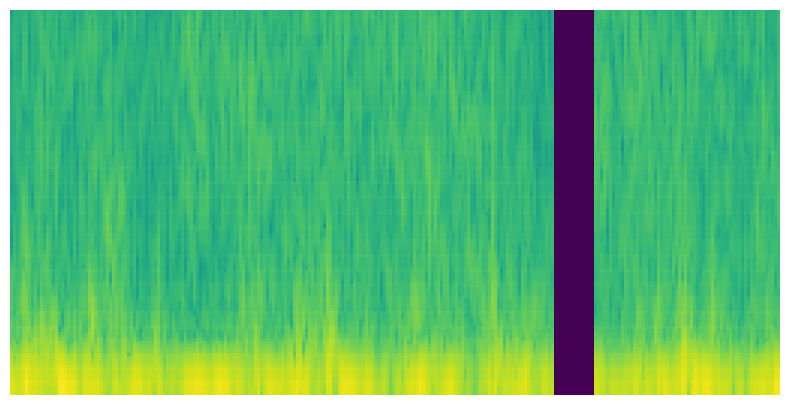

In [ ]:
params2 = {
    "num_masks_x": 1,    
    "mask_x_length": (0, 20), # This line changed from fixed  to a range
    "fill_value": 0,
}
transform2 = A.Compose([A.XYMasking(**params2, p=1)])
visualize(transform2(image=img[:, :, 0])["image"])

### Analogous transform in torchaudio¶

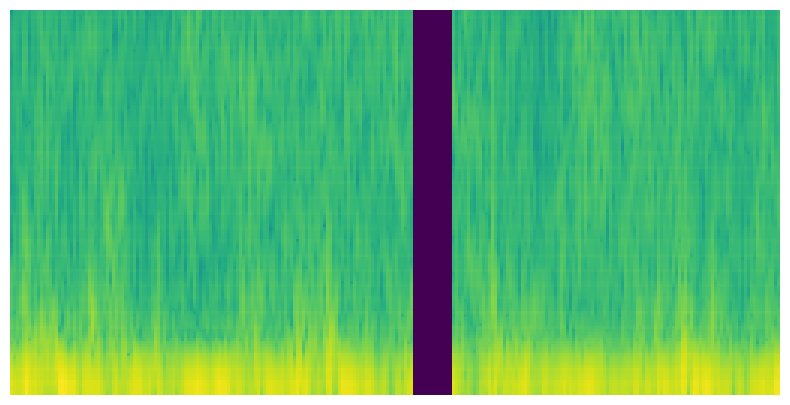

In [ ]:
spectrogram = torchaudio.transforms.Spectrogram()
masking = torchaudio.transforms.TimeMasking(time_mask_param=20)
masked = masking(torch.from_numpy(img[:, :, 0]))
visualize(masked.numpy())

## One horizontal stripe (frequency masking) with randomly sampled width, filled with 0

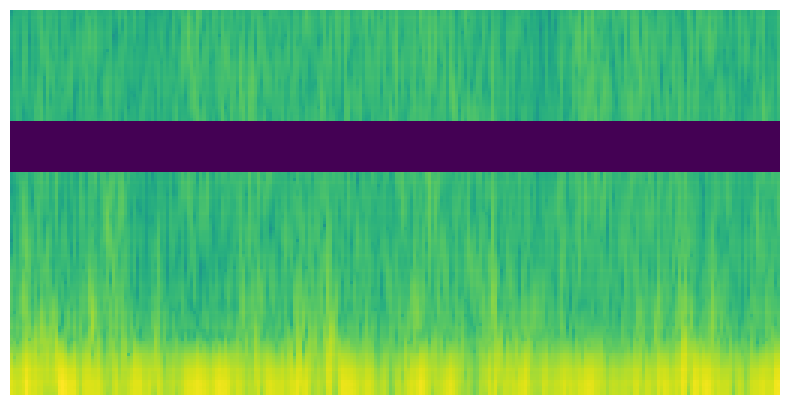

In [ ]:
params3 = {    
    "num_masks_y": 1,    
    "mask_y_length": (0, 20),
    "fill_value": 0,    

}
transform3 = A.Compose([A.XYMasking(**params3, p=1)])
visualize(transform3(image=img[:, :, 0])["image"])

### Analogous transform in torchaudio

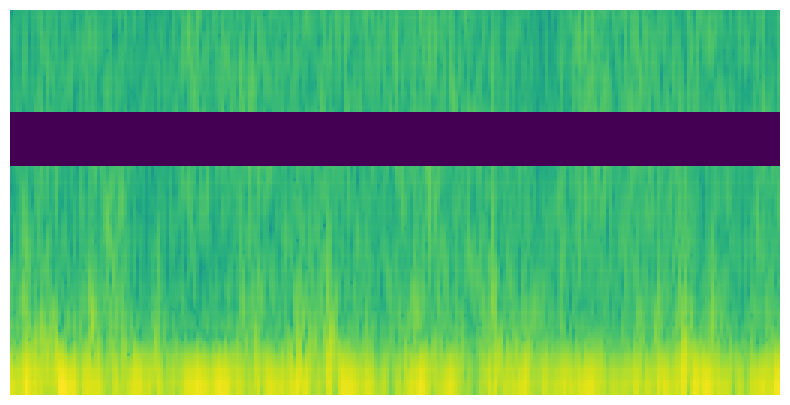

In [ ]:
spectrogram = torchaudio.transforms.Spectrogram()
masking = torchaudio.transforms.FrequencyMasking(freq_mask_param=20)
masked = masking(torch.from_numpy(img[:, :, 0]))
visualize(masked)

## Several vertical and horizontal stripes

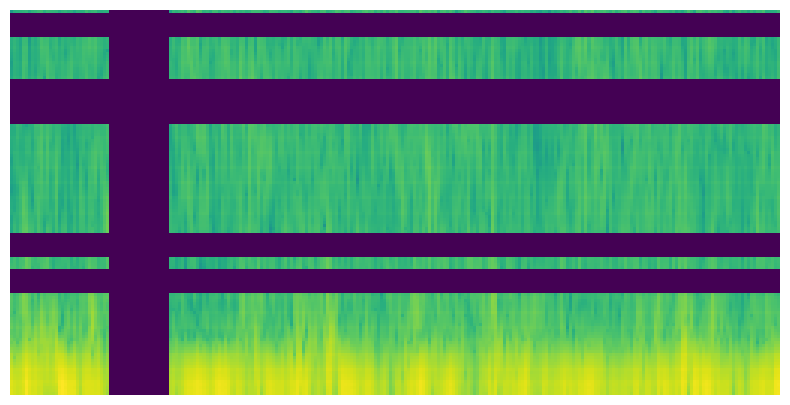

In [ ]:
params4 = {    
    "num_masks_x": (2, 4),
    "num_masks_y": 5,    
    "mask_y_length": 8,
    "mask_x_length": (10, 20),
    "fill_value": 0,  

}
transform4 = A.Compose([A.XYMasking(**params4, p=1)])
visualize(transform4(image=img[:, :, 0])["image"])

## Application to the image with the number of channels larger than 3, and different fill values for different channels

Transform can work with any number of channels supporing image shapes of

* Grayscale: (height, width)
* RGB: (height, width, 3)
* Multichannel: (heigh, width, num_channels)

For value that is used to fill masking regions you can use:

* scalar that will be applied to every channel
* list of numbers equal to the number of channels, so that every channel will have it's own filling value

In [ ]:
params5 = {    
    "num_masks_x": (2, 4),
    "num_masks_y": 5,    
    "mask_y_length": 8,
    "mask_x_length": (20, 30),
    "fill_value": (0, 1, 2, 3),  

}
transform5 = A.Compose([A.XYMasking(**params5, p=1)])
transformed = transform5(image=img)["image"]

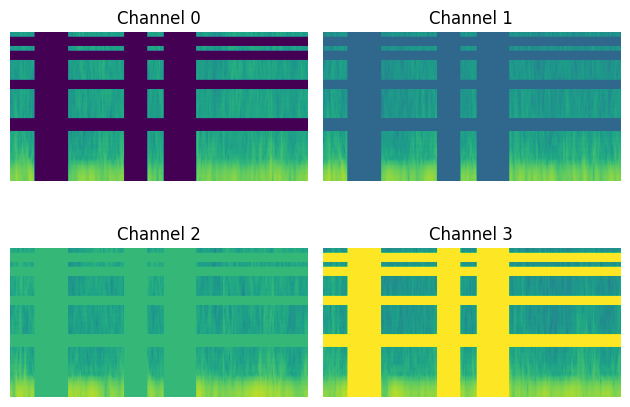

In [ ]:
fig, axs = plt.subplots(2, 2) 
vmin=0
vmax=3

axs[0, 0].imshow(transformed[:, :, 0], vmin=vmin, vmax=vmax)
axs[0, 0].set_title('Channel 0')
axs[0, 0].axis('off')  # Hide axes for cleaner visualization

axs[0, 1].imshow(transformed[:, :, 1], vmin=vmin, vmax=vmax)
axs[0, 1].set_title('Channel 1')
axs[0, 1].axis('off')

axs[1, 0].imshow(transformed[:, :, 2], vmin=vmin, vmax=vmax)
axs[1, 0].set_title('Channel 2')
axs[1, 0].axis('off')

axs[1, 1].imshow(transformed[:, :, 3], vmin=vmin, vmax=vmax)
axs[1, 1].set_title('Channel 3')
axs[1, 1].axis('off')

plt.tight_layout()

plt.show()